## Identitas
Nama : Fauzan Pradana
NIM : 2041720224
Kelas : TI3G
Absen : 10

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
sns.set()

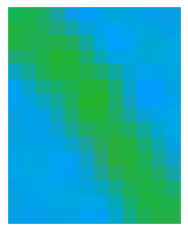

In [36]:
# Membaca Image
me = mpimg.imread('assets/fauzan - Copy.jpg')
ax = plt.axes(xticks=[], yticks=[])
# Output Images
plt.imshow(me)

In [37]:
me.shape

(15, 12, 3)

In [38]:
data = me / 255.0
data = data.reshape(15 * 12, 3)
data.shape

(180, 3)

In [39]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

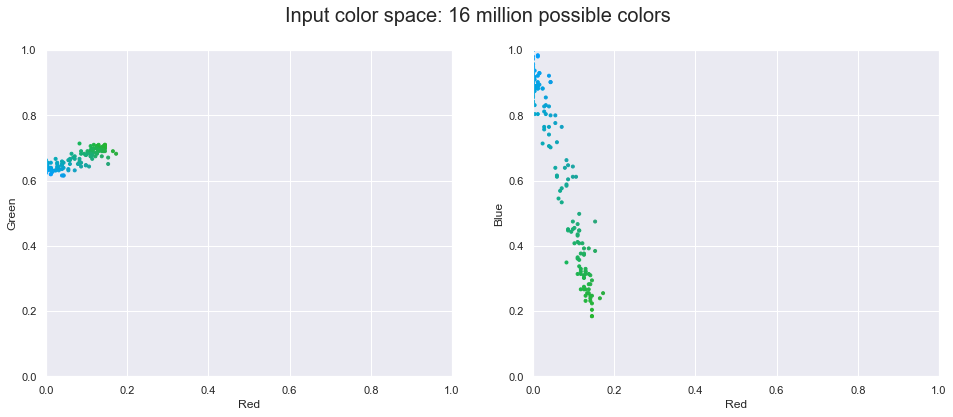

In [40]:
plot_pixels(data, title='Input color space: 16 million possible colors')

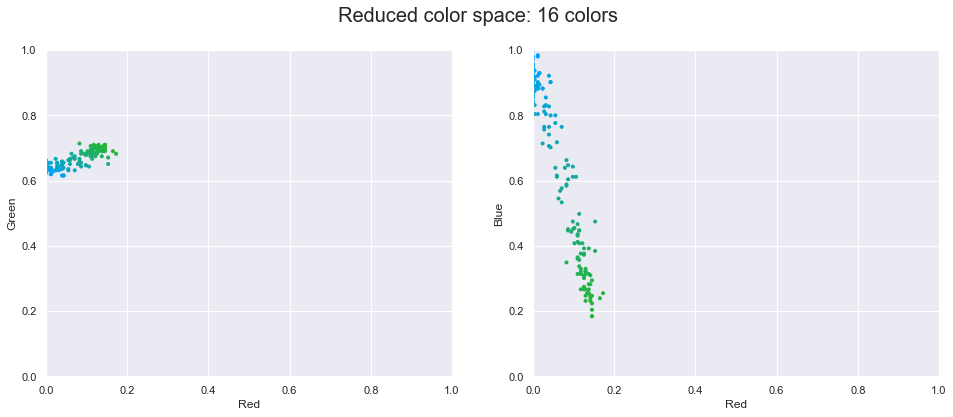

In [41]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

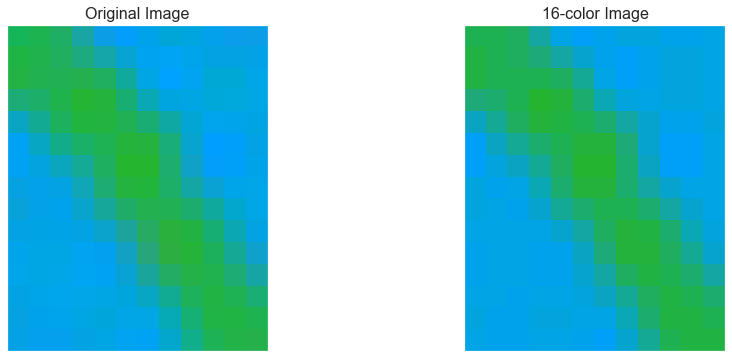

In [42]:
kucing_recolored = new_colors.reshape(me.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(me)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(kucing_recolored)
ax[1].set_title('16-color Image', size=16)

## Tentukan hasil Elbow Method dan visualisasi line chartnya dengan function sebagai berikut:

In [43]:
from sklearn.cluster import KMeans

In [44]:
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) * 2 + (points[i, 1] -curr_center[1]) * 2
        sse.append(curr_sse)
    return sse

In [45]:
k_max = 10
y = calculate_WSS(data,k_max)

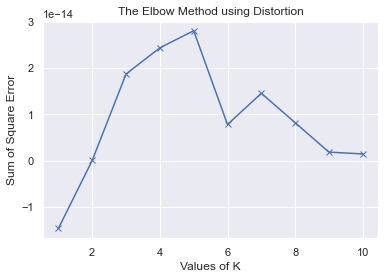

In [46]:
plt.plot(range(1, 11), y, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of Square Error')
plt.title('The Elbow Method using Distortion')
plt.show()

In [47]:
y

[-1.459943277382081e-14,
 8.326672684688674e-17,
 1.8721135752741702e-14,
 2.4369395390522186e-14,
 2.8053948053496924e-14,
 7.827072323607354e-15,
 1.4557799410397365e-14,
 8.215650382226158e-15,
 1.8596235662471372e-15,
 1.4710455076283324e-15]

## The Silhouette Method

In [49]:
from sklearn.metrics import silhouette_score
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, k_max+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

sil

[0.7529443782481136,
 0.6910021600581243,
 0.6542300903997714,
 0.6038063265946487,
 0.5144374791805333,
 0.4887256267296509,
 0.5040680093519044,
 0.5011484449541036,
 0.48541282652119155]

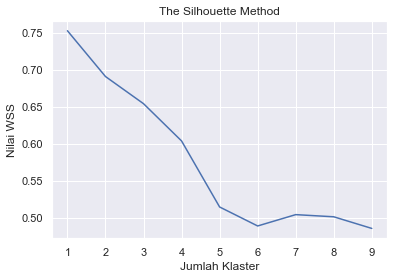

In [50]:
xsil = [1,2,3,4,5,6,7,8,9,]

plt.plot(xsil, sil) 
plt.title('The Silhouette Method')
plt.xlabel('Jumlah Klaster') 
plt.ylabel('Nilai WSS') 
plt.show()